# Networks

Networks are another important data structure in transportaiton.  Think roadway networks in particular, but many things can be represented as a network.  We'll go over a few basics in class. 

MPOs or DOTs with a travel model will maintain a network representation of the street network for use in the model.  This will have the attributes the model needs: free flow speed, capacity, length, directionality, turn restrictions, facility type, etc.  Usually, the best way to get a copy is to call up your friendly local transportation modler and ask.  Even in this tech-crazy world, it is amazing how far asking politely will get you...

...however, that's not what we're going to do here.  Instead, we are going to work with network data from OpenStreetMap: 

http://www.openstreetmap.org/

To make it easier, we will work with a package called OSMnx, by Geoff Boeing. You can read a paper on the toolkit here: 

https://www.researchgate.net/publication/309738462_OSMNX_New_Methods_for_Acquiring_Constructing_Analyzing_and_Visualizing_Complex_Street_Networks

And a blog post here: 

http://geoffboeing.com/2016/11/osmnx-python-street-networks/


### Homework

Your homework is to: 

1. Read the network paper linked above. 

2. Use the blog post to figure out how to install and use the package. 

3. Get the street network for Lexington.  

4. Print the basic_stats for the network. 

5. Calculate and show the shortest path from your home (or another point of interest) to UK campus.  Is this the route you would take?  What is the same or different?

6. Repeat step 5 for three other trips that you make regularly.  

 

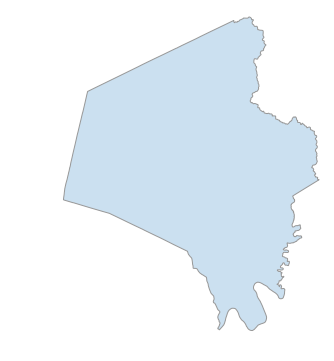

(<matplotlib.figure.Figure at 0x26737b584a8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x267241753c8>)

In [26]:
import osmnx as ox
import pprint
county = ox.gdf_from_place('Fayette County, Kentucky')
ox.plot_shape(ox.project_gdf(county))

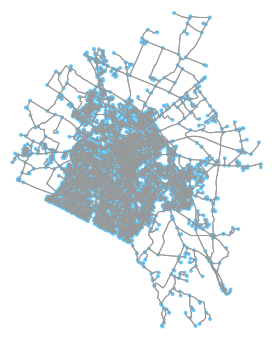

(<matplotlib.figure.Figure at 0x2672a700320>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2672a700860>)

In [30]:
G = ox.graph_from_place('Fayette County, Kentucky', network_type='drive')
ox.plot_graph(G)

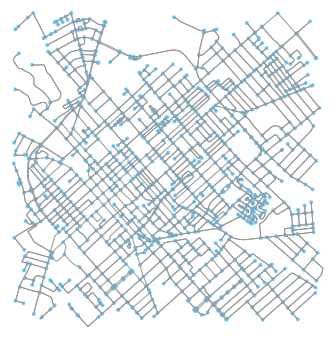

(<matplotlib.figure.Figure at 0x2673694b048>,
 <matplotlib.axes._subplots.AxesSubplot at 0x26736945e48>)

In [32]:
G = ox.graph_from_address('152 East 4th Street, Lexington, KY', distance =2000, network_type='drive')
ox.plot_graph(G)

In [33]:
basic_stats = ox.basic_stats(G)
pprint.pprint(basic_stats)

{'circuity_avg': 1.0328193665270822,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None,
 'edge_density_km': None,
 'edge_length_avg': 111.46813713910753,
 'edge_length_total': 339754.88199999975,
 'intersection_count': 1046,
 'intersection_density_km': None,
 'k_avg': 5.109807208717519,
 'm': 3048,
 'n': 1193,
 'node_density_km': None,
 'self_loop_proportion': 0.00557742782152231,
 'street_density_km': None,
 'street_length_avg': 110.01261741122582,
 'street_length_total': 192082.0300000003,
 'street_segments_count': 1746,
 'streets_per_node_avg': 2.986588432523051,
 'streets_per_node_counts': {0: 0, 1: 147, 2: 8, 3: 760, 4: 270, 5: 8},
 'streets_per_node_proportion': {0: 0.0,
                                 1: 0.12321877619446772,
                                 2: 0.006705783738474434,
                                 3: 0.6370494551550713,
                                 4: 0.22632020117351215,
                                 5: 0.006705783738474434}}


In [34]:
#Home
origin = ox.get_nearest_node(G, (38.0496952, -84.4894170))
#University of Kentucky
destination = ox.get_nearest_node(G, (38.0333742, -84.5017758))
#work - Kentucky American Water
destination1 = ox.get_nearest_node(G, (38.0159437, -84.4631487))

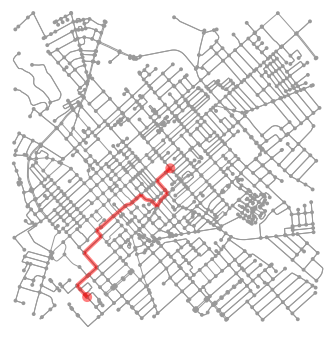

In [35]:
import networkx as nx
s_route = nx.shortest_path(G, origin, destination)
s_map =ox.plot_graph_route(G, s_route)

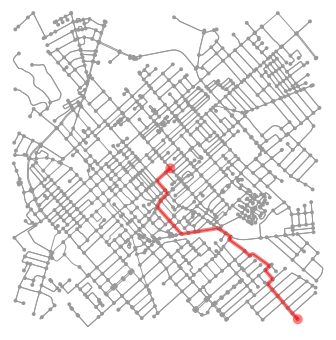

In [36]:
w_route = nx.shortest_path(G, origin, destination1)
w_map = ox.plot_graph_route(G, w_route)